In [11]:
gamm <- function(n, a, b) {
    mu <- a/b
    sig <- sqrt(a/(b*b))
    vec <- vector("numeric", n)
    x <- a/b
    vec[1] <- x
    for (i in 2:n) {
        candidate <- rnorm(1, mu, sig)
        accept <- min(
            1,
            (dgamma(candidate, a, b) / dgamma(x, a, b)) / (dnorm(candidate, mu, sig))
        )
        u <- runif(1)
        if (u < accept)
            x <- candidate
        vec[i] <- candidate
    }
    vec
}

In [12]:
vec <- gamm(100000, 2.3, 2.7)

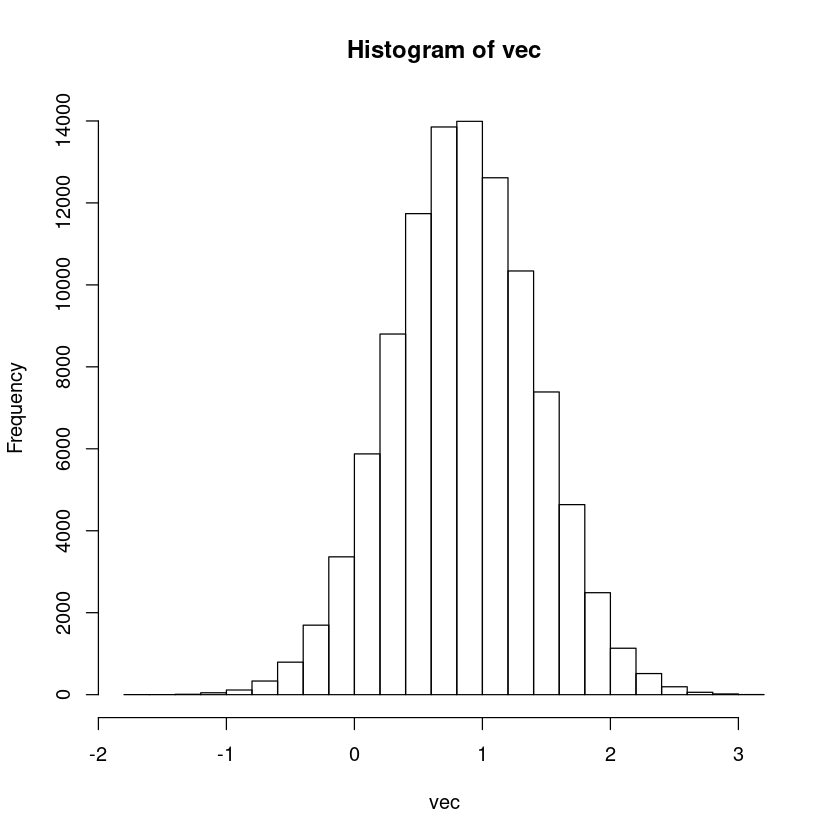

In [13]:
hist(vec, 30)

In [7]:
c(mean(vec), var(vec))

[1] 0.8534989 0.3134814

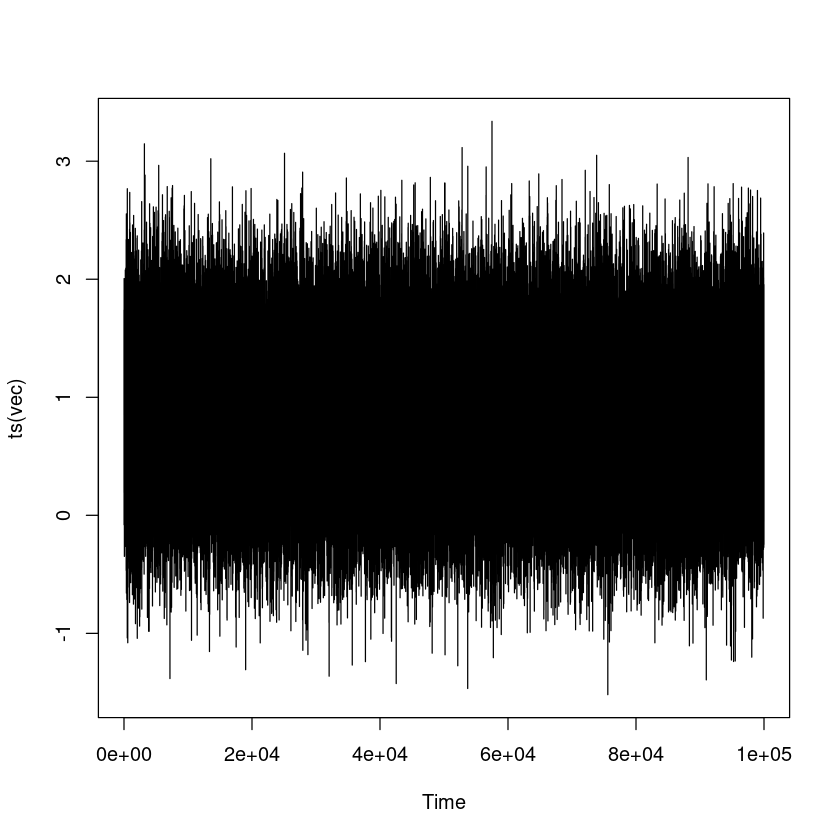

In [8]:
plot(ts(vec))

In [9]:
accept <- min(1, (dgamma(candidate,a, b)/dgamma(x, a, b))/(dnorm(candidate,mu,

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: accept <- min(1, (dgamma(candidate,a, b)/dgamma(x, a, b))/(dnorm(candidate,mu,
   ^


In [22]:
target = function(x, a, b) {
    return (dbeta(x, a, b) + 7)
}

In [24]:
x = rep(0, 100000)
x[1] = 3
a = 0.35
b = 0.65
for (i in 2:100000) {
    current_x = x[i-1]
    proposed_x = current_x + rnorm(1, mean=0, sd=1)
    A = target(proposed_x,a,b) / target(current_x, a, b)
    if (runif(1) < A) {
        x[i] = proposed_x
    } else {
        x[i] = current_x
    }
}

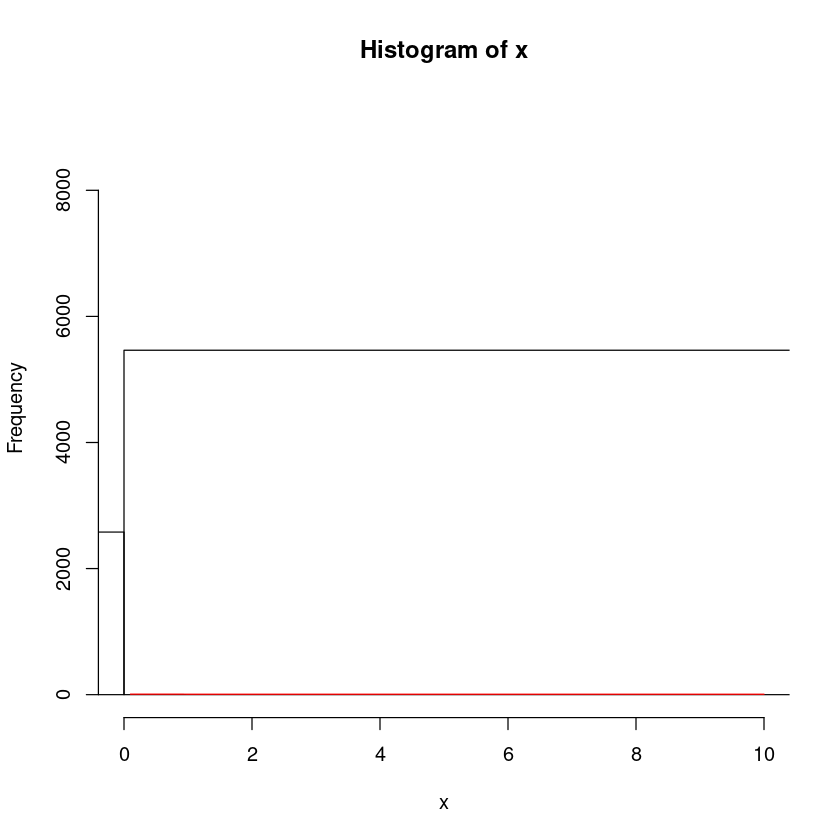

In [35]:
hist(x, xlim=c(0,10), 30)
xx = seq(0, 10, length=100)
lines(xx, target(xx, a, b), col="red")